In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df1 = pd.read_csv('accidents_2005_to_2007.csv',low_memory=False)
df2 = pd.read_csv('accidents_2009_to_2011.csv',low_memory=False)
df3 = pd.read_csv('accidents_2012_to_2014.csv',low_memory=False)
df_all = pd.concat([df1, df2, df3])

In [27]:
df_all.head(5)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1.0,Yes,E01002849,2005.0
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1.0,Yes,E01002909,2005.0
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1.0,Yes,E01002857,2005.0
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1.0,Yes,E01002840,2005.0
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1.0,Yes,E01002863,2005.0


In [28]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 920985 entries, 0 to 313394
Data columns (total 33 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               920985 non-null  object 
 1   Location_Easting_OSGR                        920911 non-null  float64
 2   Location_Northing_OSGR                       920911 non-null  float64
 3   Longitude                                    920911 non-null  float64
 4   Latitude                                     920911 non-null  float64
 5   Police_Force                                 920985 non-null  int64  
 6   Accident_Severity                            920985 non-null  int64  
 7   Number_of_Vehicles                           920985 non-null  int64  
 8   Number_of_Casualties                         920985 non-null  int64  
 9   Date                                         920985 non-null  ob

In [29]:
df_all.shape

(920985, 33)

In [30]:
df_all.dtypes

,0
Accident_Index,object
Location_Easting_OSGR,float64
Location_Northing_OSGR,float64
Longitude,float64
Latitude,float64
Police_Force,int64
Accident_Severity,int64
Number_of_Vehicles,int64
Number_of_Casualties,int64
Date,object


In [31]:
df_all.isnull().sum()

,0
Accident_Index,0
Location_Easting_OSGR,74
Location_Northing_OSGR,74
Longitude,74
Latitude,74
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0


In [32]:
df_new = df_all[['Accident_Severity', 'Police_Force', 'Number_of_Casualties', 'Date','Day_of_Week' ,'Time' ,'Local_Authority_(District)'
,'Local_Authority_(Highway)', 'Road_Type', 'Speed_limit','Light_Conditions', 'Weather_Conditions','Road_Surface_Conditions', 'Year']]

In [33]:
df_new.head(5)

,Accident_Severity,Police_Force,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Year
0,2,1,1,04/01/2005,3,17:42,12,E09000020,Single carriageway,30.0,Daylight: Street light present,Raining without high winds,Wet/Damp,2005.0
1,3,1,1,05/01/2005,4,17:36,12,E09000020,Dual carriageway,30.0,Darkness: Street lights present and lit,Fine without high winds,Dry,2005.0
2,3,1,1,06/01/2005,5,00:15,12,E09000020,Single carriageway,30.0,Darkness: Street lights present and lit,Fine without high winds,Dry,2005.0
3,3,1,1,07/01/2005,6,10:35,12,E09000020,Single carriageway,30.0,Daylight: Street light present,Fine without high winds,Dry,2005.0
4,3,1,1,10/01/2005,2,21:13,12,E09000020,Single carriageway,30.0,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,2005.0


In [34]:
df_new.shape

(920985, 14)

In [35]:
df_new.isnull().sum()

,0
Accident_Severity,0
Police_Force,0
Number_of_Casualties,0
Date,0
Day_of_Week,0
Time,61
Local_Authority_(District),0
Local_Authority_(Highway),0
Road_Type,1
Speed_limit,1


In [36]:
df_new.dropna(inplace=True)

In [37]:
df_new.isnull().sum()

,0
Accident_Severity,0
Police_Force,0
Number_of_Casualties,0
Date,0
Day_of_Week,0
Time,0
Local_Authority_(District),0
Local_Authority_(Highway),0
Road_Type,0
Speed_limit,0


In [38]:
df_new.dtypes

,0
Accident_Severity,int64
Police_Force,int64
Number_of_Casualties,int64
Date,object
Day_of_Week,int64
Time,object
Local_Authority_(District),int64
Local_Authority_(Highway),object
Road_Type,object
Speed_limit,float64


In [39]:
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [40]:
df_new["Date"] = pd.to_datetime(df_new["Date"], format ="%d/%m/%Y" )
df_new["Time"] = pd.to_datetime(df_new["Time"], format='%H:%M')
df_new['Month'] = df_new['Date'].dt.month
df_new['Hour'] = pd.to_datetime(df_new['Time']).dt.hour

In [41]:
df_new.head(5)

,Accident_Severity,Police_Force,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Year,Month,Hour
0,2,1,1,2005-01-04,3,1900-01-01 17:42:00,12,E09000020,Single carriageway,30.0,Daylight: Street light present,Raining without high winds,Wet/Damp,2005.0,1,17
1,3,1,1,2005-01-05,4,1900-01-01 17:36:00,12,E09000020,Dual carriageway,30.0,Darkness: Street lights present and lit,Fine without high winds,Dry,2005.0,1,17
2,3,1,1,2005-01-06,5,1900-01-01 00:15:00,12,E09000020,Single carriageway,30.0,Darkness: Street lights present and lit,Fine without high winds,Dry,2005.0,1,0
3,3,1,1,2005-01-07,6,1900-01-01 10:35:00,12,E09000020,Single carriageway,30.0,Daylight: Street light present,Fine without high winds,Dry,2005.0,1,10
4,3,1,1,2005-01-10,2,1900-01-01 21:13:00,12,E09000020,Single carriageway,30.0,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,2005.0,1,21


In [42]:
df_new['Year'].unique()

array([2005., 2006., 2009., 2010., 2012., 2013.])

In [44]:
yıl_kaza = df_new.groupby("Year")

In [53]:
yıl_kaza_sayısı=pd.DataFrame(yıl_kaza.size().sort_values(ascending=False),columns=["Sayı"])

In [54]:
yıl_kaza_sayısı.head(10)

,Sayı
Year,
2005.0,198474
2012.0,179436
2009.0,163334
2010.0,141499
2013.0,133412
2006.0,103399


Text(0.5, 1.0, 'Yıl Bazında Kaza Sayısı')

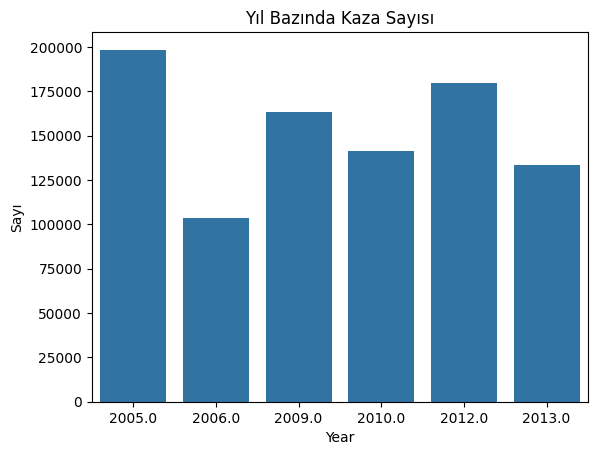

In [56]:
sns.barplot(y=yıl_kaza_sayısı['Sayı'], x= yıl_kaza_sayısı.index)
plt.title("Yıl Bazında Kaza Sayısı")

In [57]:
df_new["Light_Conditions"].unique()

array(['Daylight: Street light present',
       'Darkness: Street lights present and lit',
       'Darkness: Street lighting unknown',
       'Darkness: Street lights present but unlit',
       'Darkeness: No street lighting'], dtype=object)

In [58]:
day_say = df_new.groupby("Day_of_Week")
day=pd.DataFrame(day_say.size().sort_values(ascending=False),columns=["days"])

road_say = df_new.groupby("Road_Type")
road=pd.DataFrame(road_say.size().sort_values(ascending=False),columns=["road _nums"])

light_say = df_new.groupby("Light_Conditions")
light=pd.DataFrame(light_say.size().sort_values(ascending=False),columns=["light_nums"])

weather_say = df_new.groupby("Weather_Conditions")
weather=pd.DataFrame(weather_say.size().sort_values(ascending=False),columns=["weather_nums"])

road_surface_say = df_new.groupby("Road_Surface_Conditions")
road_surface=pd.DataFrame(road_surface_say.size().sort_values(ascending=False),columns=["road_surface_nums"])

speed_limit_say = df_new.groupby("Speed_limit")
speed_limit=pd.DataFrame(speed_limit_say.size().sort_values(ascending=False),columns=["speed_limits"])

hour_say = df_new.groupby("Hour")
hour=pd.DataFrame(hour_say.size().sort_values(ascending=False),columns=["hours"])

month_say = df_new.groupby("Month")
month=pd.DataFrame(month_say.size().sort_values(ascending=False),columns=["months"])

Text(0, 0.5, 'Kaza Sayısı')

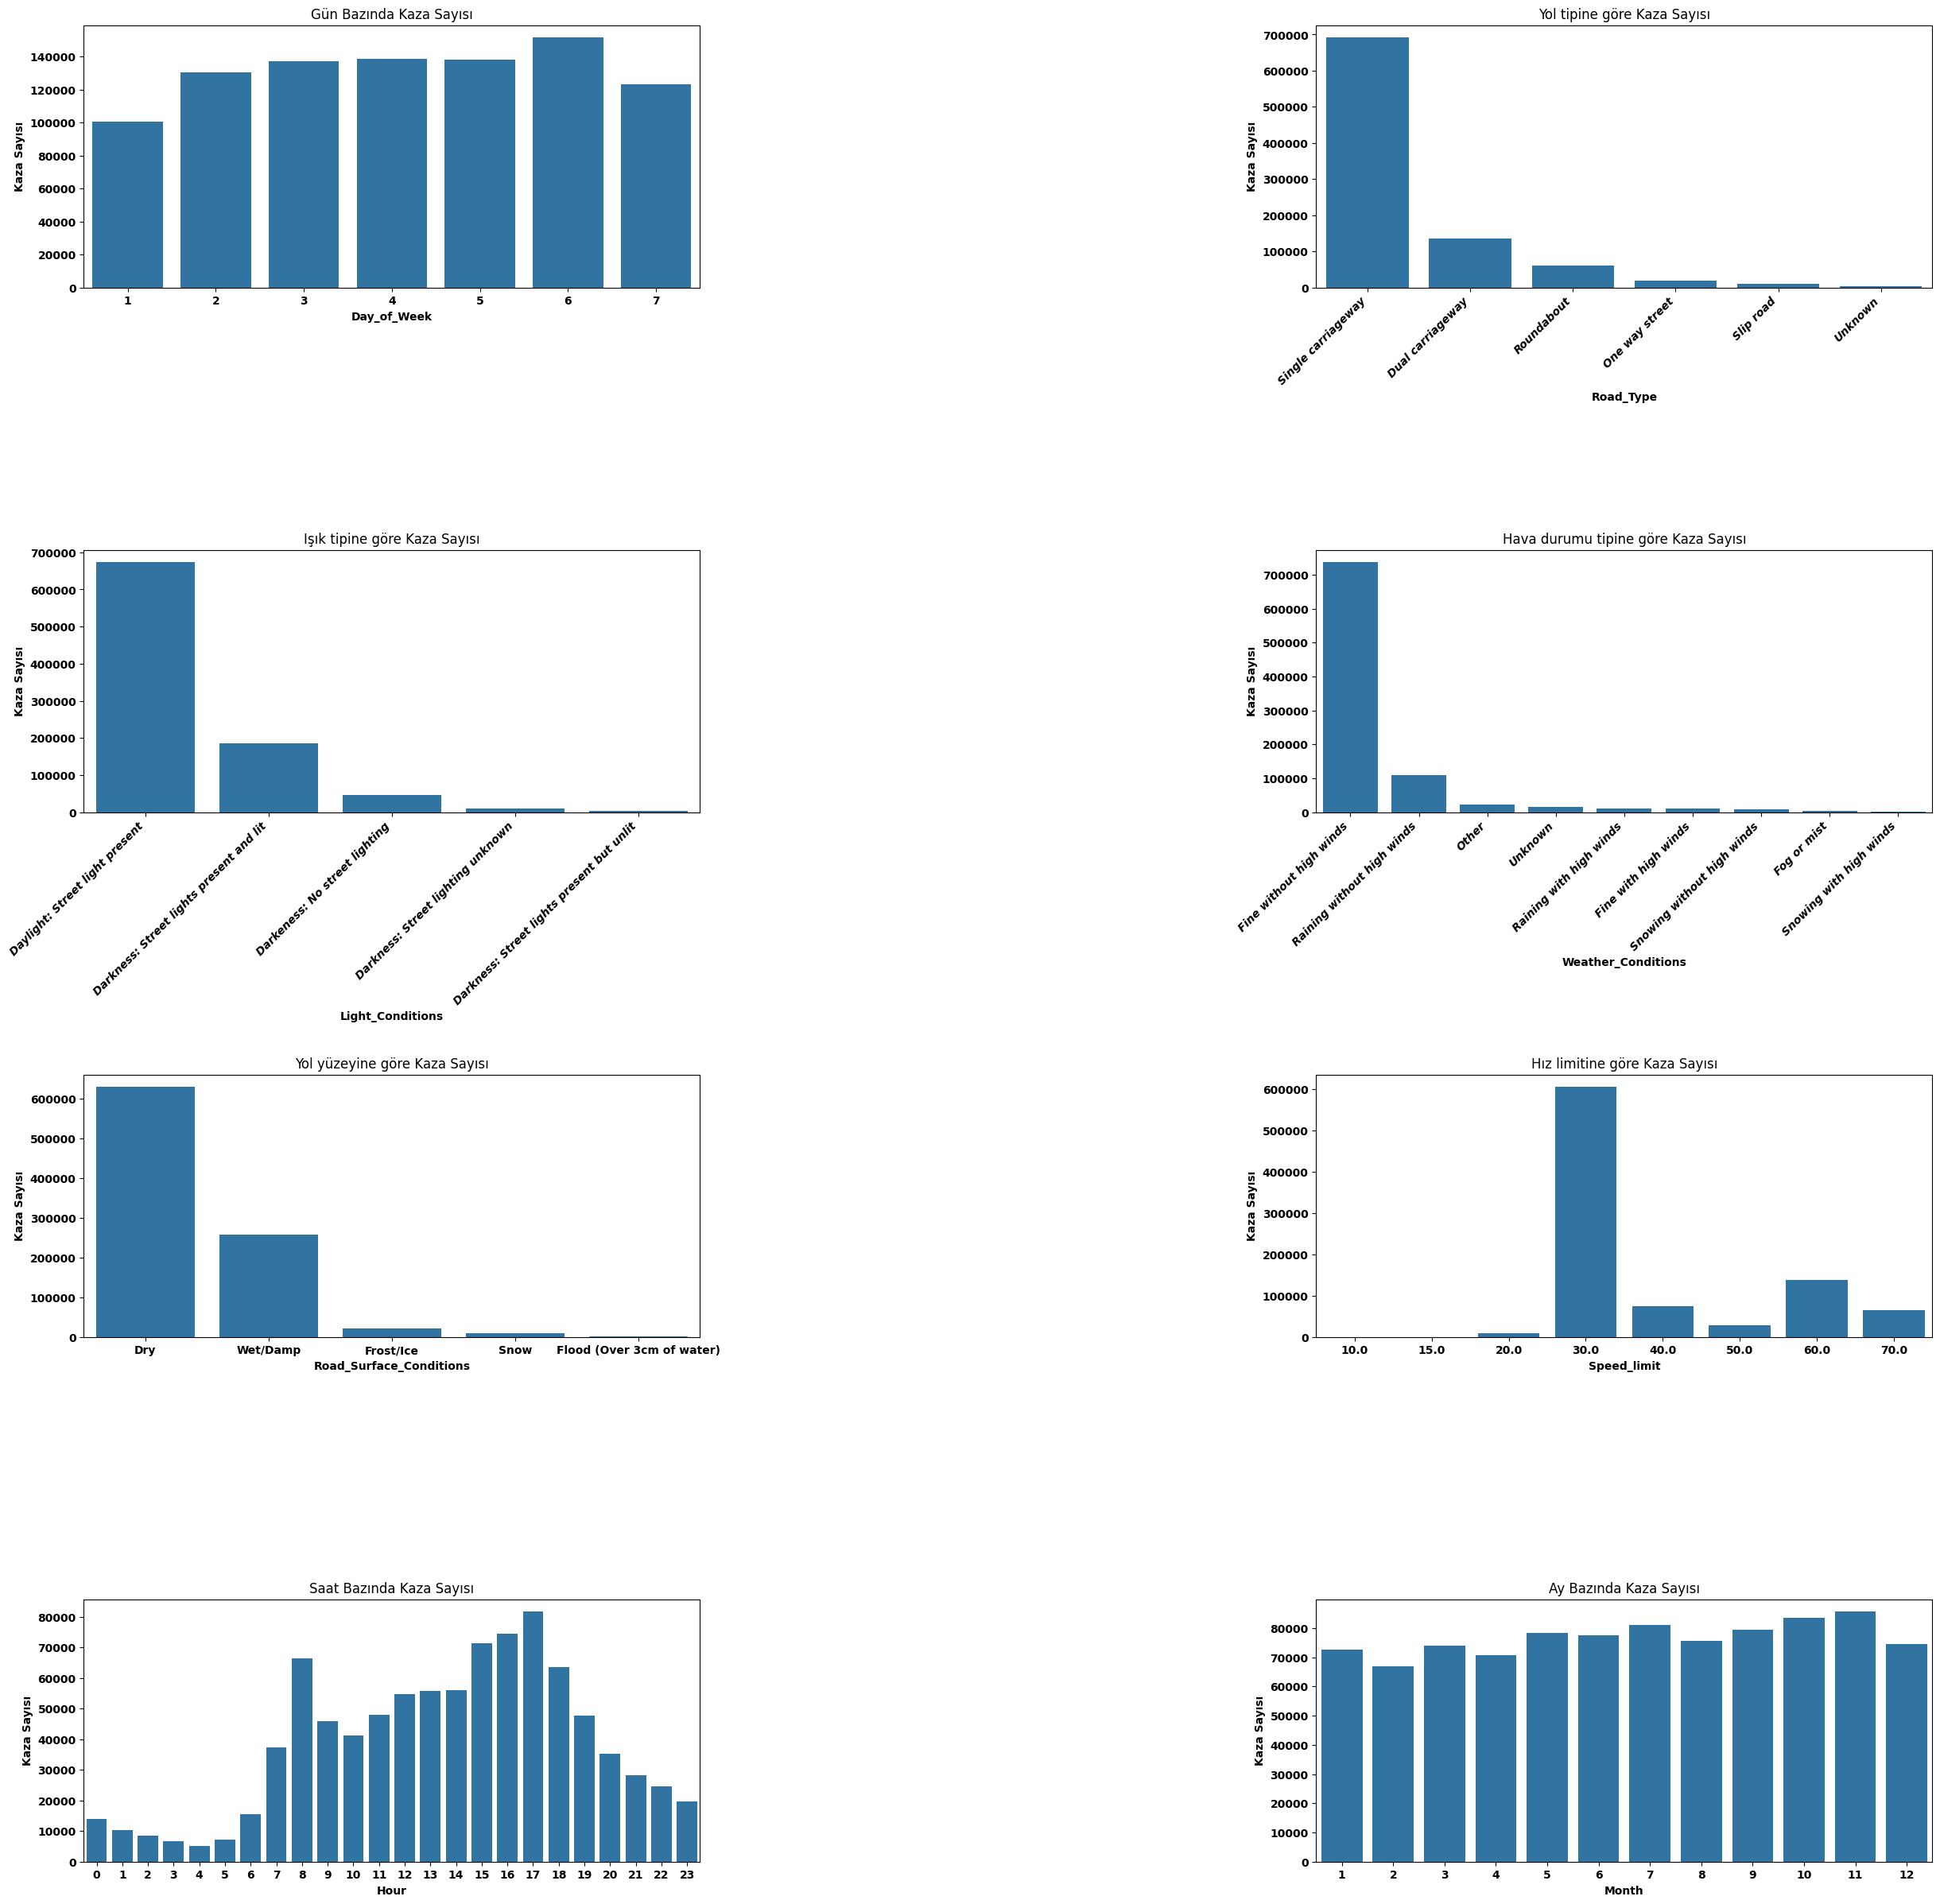

In [71]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.figure(figsize=(30,30))
plt.subplot(4, 2, 1)
sns.barplot(y=day['days'], x= day.index)
plt.title("Gün Bazında Kaza Sayısı")
plt.ylabel('Kaza Sayısı')

plt.subplot(4, 2, 2)
sns.barplot(y=road['road _nums'], x= road.index)
plt.title("Yol tipine göre Kaza Sayısı")
plt.xticks(rotation=45, ha='right', fontstyle='italic')
plt.ylabel('Kaza Sayısı')

plt.subplot(4, 2, 3)
sns.barplot(y=light['light_nums'], x= light.index)
plt.title("Işık tipine göre Kaza Sayısı")
plt.xticks(rotation=45, ha='right', fontstyle='italic')
plt.ylabel('Kaza Sayısı')

plt.subplot(4, 2, 4)
sns.barplot(y=weather['weather_nums'], x= weather.index)
plt.title("Hava durumu tipine göre Kaza Sayısı")
plt.xticks(rotation=45, ha='right', fontstyle='italic')
plt.ylabel('Kaza Sayısı')

plt.subplot(4, 2, 5)
sns.barplot(y=road_surface['road_surface_nums'], x= road_surface.index)
plt.title("Yol yüzeyine göre Kaza Sayısı")
plt.ylabel('Kaza Sayısı')

plt.subplot(4, 2, 6)
sns.barplot(y=speed_limit['speed_limits'], x= speed_limit.index)
plt.title("Hız limitine göre Kaza Sayısı")
plt.ylabel('Kaza Sayısı')

plt.subplot(4, 2, 7)
sns.barplot(y=hour['hours'], x= hour.index)
plt.title("Saat Bazında Kaza Sayısı")
plt.ylabel('Kaza Sayısı')

plt.subplot(4, 2, 8)
sns.barplot(y=month['months'], x= month.index)
plt.title("Ay Bazında Kaza Sayısı")
plt.subplots_adjust(wspace=1, hspace=1)
plt.ylabel('Kaza Sayısı')

In [72]:
district = df_new.groupby("Local_Authority_(District)")
district_say=pd.DataFrame(district.size().sort_values(ascending=False),columns=["district_nums"])

highway = df_new.groupby("Local_Authority_(Highway)")
highway_say=pd.DataFrame(highway.size().sort_values(ascending=False),columns=["highway_nums"])

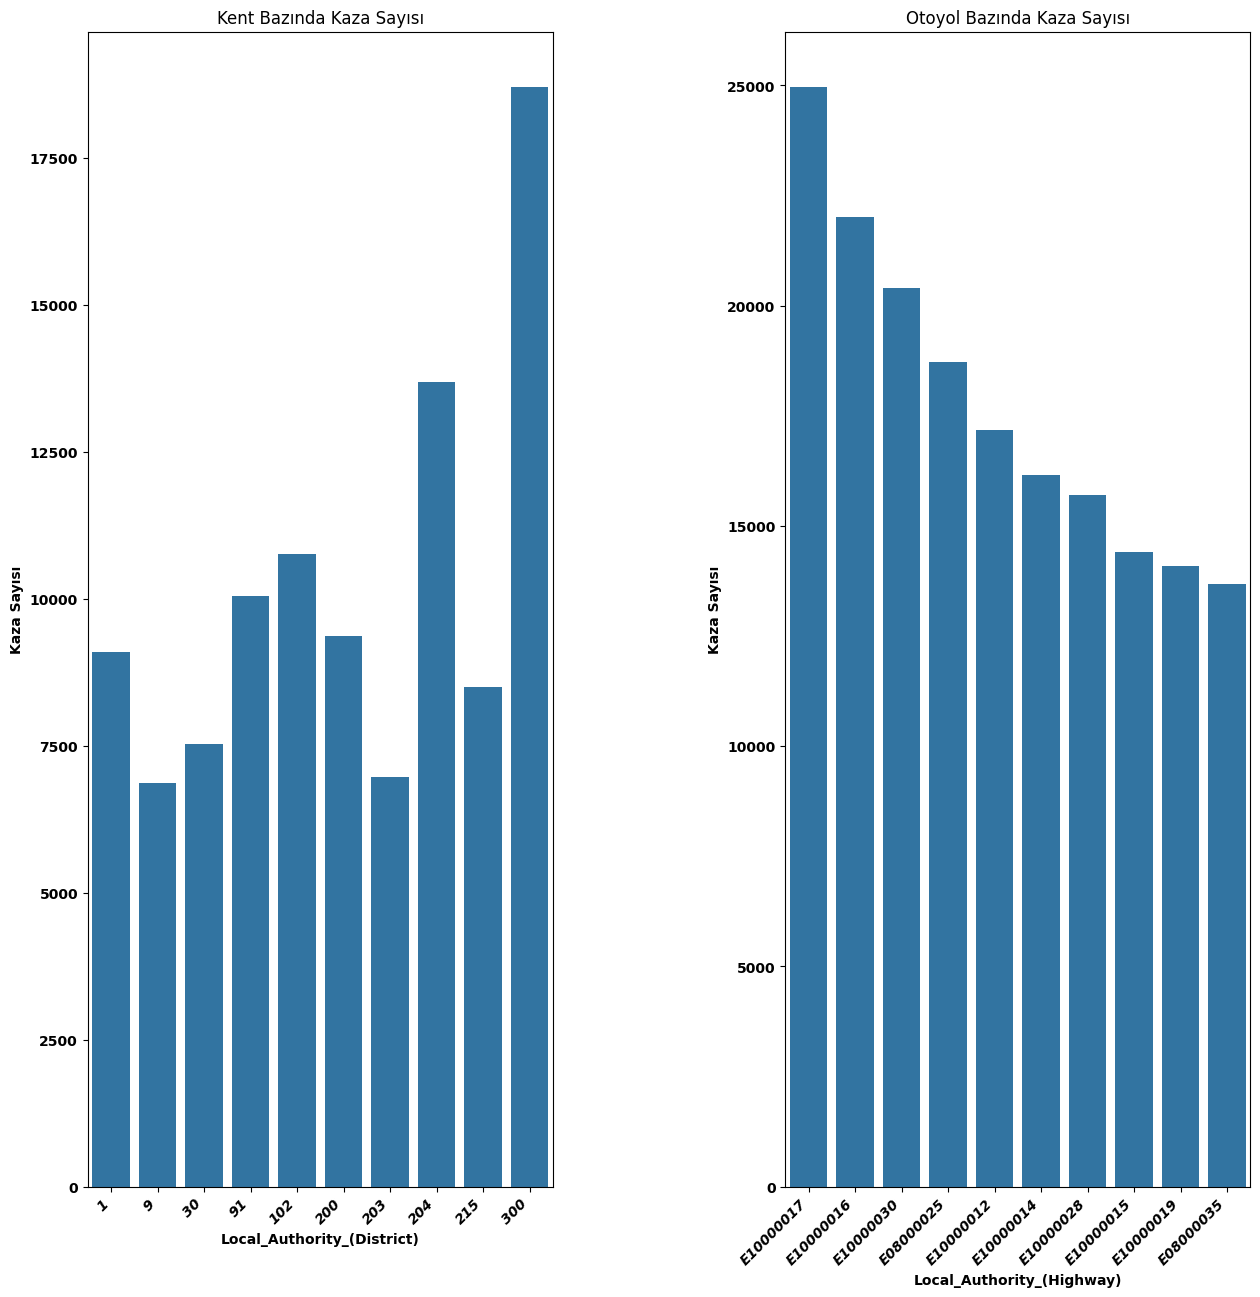

In [83]:
plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
sns.barplot(y=district_say['district_nums'][:10], x= district_say.index[:10])
plt.title("Kent Bazında Kaza Sayısı")
plt.ylabel('Kaza Sayısı')
plt.xticks(rotation=45, ha='right', fontstyle='italic')

plt.subplot(1, 2, 2)
sns.barplot(y=highway_say['highway_nums'][:10], x= highway_say.index[:10])
plt.title("Otoyol Bazında Kaza Sayısı")
plt.ylabel('Kaza Sayısı')
plt.xticks(rotation=45, ha='right', fontstyle='italic')
plt.subplots_adjust(wspace=0.5, hspace=0.5)

**Linear Regression model**


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [85]:
X = df_new[['Police_Force', 'Number_of_Casualties', 'Day_of_Week', 'Hour', 'Road_Type', 'Speed_limit', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions']]
y = df_new['Accident_Severity']

X = pd.get_dummies(X)

In [86]:
X.head(5)

,Police_Force,Number_of_Casualties,Day_of_Week,Hour,Speed_limit,Road_Type_Dual carriageway,Road_Type_One way street,Road_Type_Roundabout,Road_Type_Single carriageway,Road_Type_Slip road,...,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown,Road_Surface_Conditions_Dry,Road_Surface_Conditions_Flood (Over 3cm of water),Road_Surface_Conditions_Frost/Ice,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet/Damp
0,1,1,3,17,30.0,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
1,1,1,4,17,30.0,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,1,1,5,0,30.0,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,1,1,6,10,30.0,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,1,1,2,21,30.0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [88]:
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

LinearRegression()

In [92]:
y_pred = model_reg.predict(X_test)

In [93]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.1556142935921107


In [97]:
y_pred_rounded = np.round(y_pred)
accuracy = accuracy_score(y_test, y_pred_rounded)
print('Accuracy Score:', accuracy)

Accuracy Score: 0.8526680267433413


**Ridge Regression**

In [105]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

model = Ridge()

param_grid = {'alpha': [0.1, 1, 10, 100, 1000, 10000, 100000, 10000000,]}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print('Best hyperparameters:', grid_search.best_params_)
print('Best model:', grid_search.best_estimator_)

Best hyperparameters: {'alpha': 1000}
Best model: Ridge(alpha=1000)


In [107]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [108]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.15562009723074918


In [109]:
y_pred_rounded = np.round(y_pred)
accuracy = accuracy_score(y_test, y_pred_rounded)
print('Accuracy Score:', accuracy)

Accuracy Score: 0.8526680267433413


**Karar Ağaçları**

In [110]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [111]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [112]:
y_pred = model.predict(X_test)

In [113]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.23027695293134742


In [114]:
y_pred_rounded = np.round(y_pred)
accuracy = accuracy_score(y_test, y_pred_rounded)
print('Accuracy Score:', accuracy)

Accuracy Score: 0.7889851189052107


Karar ağaçları, lineer regresyon ve ridge regresyon modreli kurduk ve en iyi sonucu lineer regresyon ile almış olduk